## <center> **Modelado de un rotor Flettner** </center>


###<center> Trabajo tutelado. Mecánica de fluidos, Curso 2023-2024</center>
####<center> Adrián Navas Montilla</center>

Grupo de prácticas:

Nombre y apellidos 1:

Nombre y apellidos 2:

-----------------------------------------

Este trabajo se realizará en grupos de 1 o 2 personas (mismos grupos de prácticas). Tiene un peso de un 10% en la Evaluación Continua. La entrega del trabajo se hará mediante Moodle. Debéis entregar dos ficheros por grupo:

- Resolución en Python: *TrabajoMF2223_GN.ipynb*, donde N es el numero de grupo. Debéis trabajar sobre esta plantilla.

- Resolución a mano de aquellos apartados etiquetados con "(A MANO)": *TrabajoMF2223_GN.pdf*, donde N es el numero de grupo.

En Moodle se indican aspectos relevantes de la evaluación (criterios de evaluación, defensa oral, etc.)


**El objetivo de este trabajo es analizar e implementar en Python un modelo de flujo alrededor de un cilindro en rotación para representar un rotor Flettner. En cada apartado, las actividades a realizar y/o preguntas a responder se identifican mediante a), b), c),... <font color='green'>en color verde</font> . Las cuestiones en las que se indica "A MANO" se deben resolver a mano y enviar la resolución en pdf como se ha explicado anteriormente.**

-----------------------------------------

## Introducción

El **rotor Flettner** es un sistema de propulsión de vehículos basado en la generación de fuerzas aerodinámicas producidas por un cilindro en rotación. Alrededor del cilindro se produce el efecto Magnus: existe una asimetría en el campo de velocidades y presiones que genera una fuerza neta en una de las direcciones. Esta fuerza se utiliza para propulsar o sustentar el vehículo en cuestión.


<img src="http://hyperphysics.phy-astr.gsu.edu/hbase/Fluids/imgflu/kuttajou.gif" width="500">


Este sistema se ha aplicado tanto en aeronaves como en barcos:


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Vaixell_de_rotor_Barbara.jpg/1280px-Vaixell_de_rotor_Barbara.jpg" width="500">






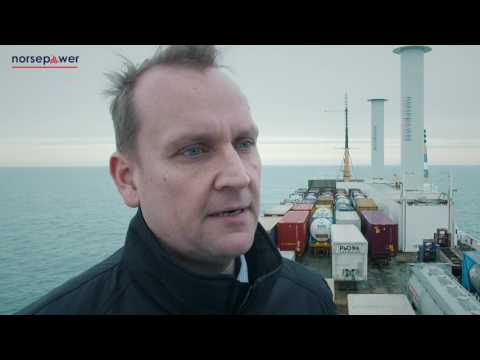

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('kDyBrSW1_Og')

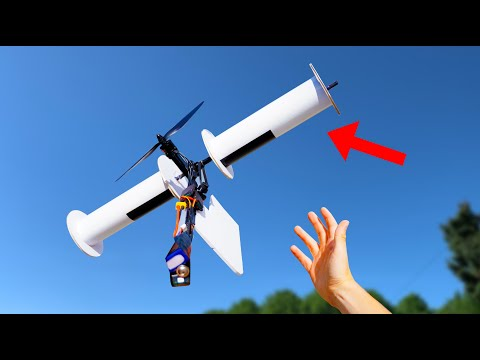

In [ ]:
YouTubeVideo('UG2O_GK7-R8')

Para representar el campo de velocidades alrededor de un cilindro en rotación podemos utilizar la superposición de varios flujos elementales: un flujo uniforme, un doblete y un vórtice libre, que luego explicaremos en qué consisten. Trabajaremos bajo la hipótesis de flujo ideal irrotacional. Con este modelo podremos, conociendo el campo de velocidades alrededor del cilindro, calcular la presión en el mismo, para finalmente calcular las fuerzas sobre el cilindro.


A continuación se detallan los flujos elementales mencionados anteriormente:

* *Flujo uniforme*. Corresponde a una corriente en dirección horizontal con velocidad constante. Su campo de velocidades viene dado por:
$$u_{uniform}\left(x,y\right) =  U_{\infty}$$

$$v_{uniform}\left(x,y\right) =  0$$


* *Doblete*. Corresponde a una pareja de fuente y sumidero que se encuentran muy cerca. Su campo de velocidades viene dado por:
$$u_{doublet}\left(x,y\right) =  -\frac{\kappa}{2\pi}\frac{x^2-y^2}{\left(x^2+y^2\right)^2}$$
$$v_{doublet}\left(x,y\right) =  -\frac{\kappa}{2\pi}\frac{2xy}{\left(x^2+y^2\right)^2}$$
donde $\kappa$ es la intensidad del doblete (a mayor intensidad, mayor será su tamaño y mayores velocidades se alcanzarán en un mismo punto).

* *Vórtice libre*. Corresponde a un flujo en rotación cuya vorticidad  es nula (vórtice irrotacional). Su campo de velocidades viene dado por:
$$u_{vortex}\left(x,y\right) = \frac{\Gamma}{2\pi}\frac{y}{x^2+y^2}$$
$$v_{vortex}\left(x,y\right) = -\frac{\Gamma}{2\pi}\frac{x}{x^2+y^2}$$
donde $\Gamma$ es la intensidad del vórtice (a mayor intensidad, mayor velocidad de giro).

Puedes encontrar más información sobre estos flujos elementales en el documento de ayuda.

La superposición de estos tres flujos elementales nos permite representar el **flujo alrededor de un cilindro en rotación**:

$$ u=u_{doublet}+u_{vortex}+u_{uniform}$$
$$ v=v_{doublet}+v_{vortex}+v_{uniform}$$
cuyo radio es

$$R=\sqrt{\frac{\kappa}{2\pi U_{\infty}}}$$

y cuya velocidad angular de giro es

$$\omega=\frac{\Gamma}{2\pi R^2}$$

A continuación se muestran los campos de velocidades de los tres flujos elementales, así como el del cilindro en rotación (superposición de los tres).

<img src="https://i.stack.imgur.com/rv7Ve.png"  width="500">


## Parte 1: Definición y visualización de los campos de velocidad

Vamos a comenzar importando algunas bibliotecas de Python:

* NumPy es una biblioteca científica para crear y gestionar matrices y arrays multidimensionales.
* Matplotlib es una librería de representación gráfica 2D que utilizaremos para visualizar nuestros resultados.
* el módulo `math` proporciona las funciones y constantes matemáticas básicas.

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

El objetivo es visualizar las líneas de flujo correspondientes a los campos de velocidades que hemos descrito anteriormente. Para ello, necesitamos definir primero un conjunto de puntos donde se calcularán las componentes de la velocidad.

Vamos a definir una malla cartesiana de puntos uniformemente espaciados dentro de un dominio espacial que tiene 4 unidades de longitud de ancho en la dirección $x$ y 2 unidades de longitud de ancho en la dirección $y$, es decir, $x,y\in\left[-2,2\right],\left[-1,1\right]$.

La variable `N` será el número de puntos que queremos en cada dirección, y definimos los límites computacionales mediante las variables `x_start`, `x_end`, `y_start` y `y_end`.

Utilizamos la función NumPy [`linspace()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) para crear dos matrices que contienen los valores uniformes de las coordenadas $x$ e $y$, correspondientes a nuestros puntos de la cuadrícula. La última línea del bloque de código de abajo llama a la función [`meshgrid()`](http://docs.scipy.org/doc/numpy-1.4.x/reference/generated/numpy.meshgrid.html), que genera matrices que contienen las coordenadas de los puntos donde se calculará la solución numérica.



In [ ]:
N = 50                                # numero de puntos en cada direccion
x_start, x_end = -2.0, 2.0            # límites izquierdo y derecho en x
y_start, y_end = -1.0, 1.0            # límites izquierdo y derecho en y
x = np.linspace(x_start, x_end, N)    # 1D-array con coordenadas en x
y = np.linspace(y_start, y_end, N)    # 1D-array con coordenadas en y

print('x = ', x)
print('y = ', y)

X, Y = np.meshgrid(x, y)              # genera las matrices

x =  [-2.         -1.91836735 -1.83673469 -1.75510204 -1.67346939 -1.59183673
 -1.51020408 -1.42857143 -1.34693878 -1.26530612 -1.18367347 -1.10204082
 -1.02040816 -0.93877551 -0.85714286 -0.7755102  -0.69387755 -0.6122449
 -0.53061224 -0.44897959 -0.36734694 -0.28571429 -0.20408163 -0.12244898
 -0.04081633  0.04081633  0.12244898  0.20408163  0.28571429  0.36734694
  0.44897959  0.53061224  0.6122449   0.69387755  0.7755102   0.85714286
  0.93877551  1.02040816  1.10204082  1.18367347  1.26530612  1.34693878
  1.42857143  1.51020408  1.59183673  1.67346939  1.75510204  1.83673469
  1.91836735  2.        ]
y =  [-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816  0.02040816  0.06122449  0.10204082  0.14285714  0.18367347
  0.2244898   0.

Ahora definiremos las funciones que nos darán los campos de velocidad del doblete, del vórtice y de la corriente libre:

In [ ]:
def get_velocity_doublet(strength, xd, yd, X, Y):

    u = (-strength / (2 * math.pi) *
         ((X - xd)**2 - (Y - yd)**2) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    v = (-strength / (2 * math.pi) *
         2 * (X - xd) * (Y - yd) /
         ((X - xd)**2 + (Y - yd)**2)**2)

    return u, v

def get_velocity_vortex(strength, xv, yv, X, Y):

    u = +strength / (2 * math.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
    v = -strength / (2 * math.pi) * (X - xv) / ((X - xv)**2 + (Y - yv)**2)

    return u, v

def get_velocity_uniform(strength):

    u = strength * np.ones((N, N), dtype=float)
    v = np.zeros((N, N), dtype=float)

    return u, v

Y evaluaremos estas funciones en nuestros puntos de la malla X,Y. También daremos valor a la intensidad del doblete, a la intensidad de la rotación del vórtice y a la velocidad de la corriente libre:

In [ ]:
kappa =                      # intensidad del doblete
gamma =                       # intensidad del vórtice
u_inf =                       # velocidad de la corriente libre
x_c, y_c = 0.0, 0.0             # posición del centro de los elementos

u_doublet, v_doublet = get_velocity_doublet(kappa, x_c, y_c, X, Y)
u_vortex, v_vortex = get_velocity_vortex(gamma, x_c, y_c, X, Y)
u_uniform, v_uniform = get_velocity_uniform(u_inf)


<font color='green'>**1.a)**</font>  Haz una representación gráfica de las lineas de corriente de cada uno de los campos de velocidad (doblete, vortice y corriente libre) por separado, utilizando `streamplot`. Se muestra a modo de ejemplo la del doblete:

Text(0, 0.5, 'y')

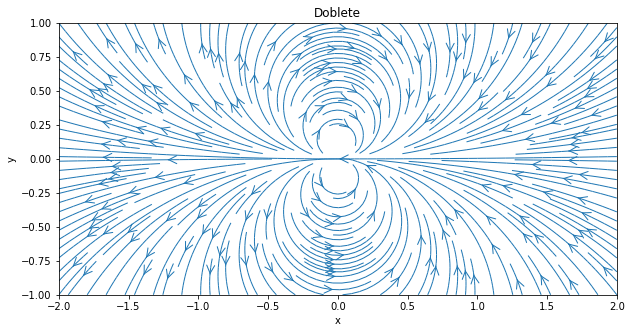

In [ ]:
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width


#Doblete
fig, ax = plt.subplots(figsize=(width,height))
ax.streamplot(X, Y, u_doublet,v_doublet,
                  density=2, linewidth=1, arrowsize=2, arrowstyle='->')

ax.set_title('Doblete')
ax.set_xlabel("x")
ax.set_ylabel("y")


#Vórtice




#Corriente libre






## Parte 2: Definición y visualización del cilindro en rotación

<font color='green'>**2.a)**</font>  Ahora, aplicando el principio de superposición, construye el campo de velocidades que resulta de superponer un doblete, un vórtice y una corriente libre:

$$ u=u_{doublet}+u_{vortex}+u_{uniform}$$
$$ v=v_{doublet}+v_{vortex}+v_{uniform}$$


In [ ]:
u_sum=
v_sum=

Y realiza la representación gráfica del mismo

Text(0, 0.5, 'y')

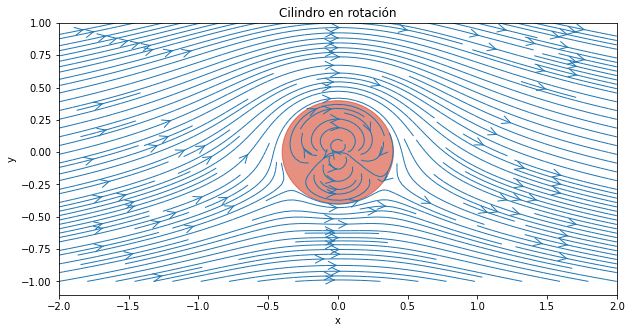

In [ ]:
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width


fig, ax = plt.subplots(figsize=(width,height))
ax.streamplot(.........)

R = math.sqrt(kappa / (2 * math.pi * u_inf))
circle = plt.Circle((0, 0), radius=R, color='#CD2305', alpha=0.5)
ax.add_patch(circle)

ax.set_title(' ........???..........')
ax.set_xlabel(" ..???.....")
ax.set_ylabel(" ...???....... ")

<font color='green'>**EJERCICIO VOLUNTARIO:**</font>  Realiza una animación en la que se vea el movimiento de las partículas fluidas y se representen las trayectorias. Para ello, puedes utilizar fragmentos de código de esta web: https://mdfi.000webhostapp.com/content/chapter1/tema1/lineas_caracteristicas.html

<font color='green'>**2.b)**</font> Utilizando la ecuación de Bernoulli (Tema 3, parte II)
$$p_\infty + \frac{1}{2}\rho U_\infty^2 = p + \frac{1}{2}\rho U^2$$
realiza una representación gráfica de la distribución de presiones utilizando la función `contourf`.

<font color='green'>**2.c)**</font> Haz lo mismo con el coeficiente de presión, que es una cantidad adimensional
$$C_p = \frac{p-p_\infty}{\frac{1}{2}\rho U_\infty^2}$$
es decir
$$C_p = 1 - \left(\frac{U}{U_\infty}\right)^2$$

Describe cómo es la distribución de presiones alrededor del cilindro y explica como cambia la distribución de presiones al modificar $\Gamma$.


Text(0, 0.5, 'y')

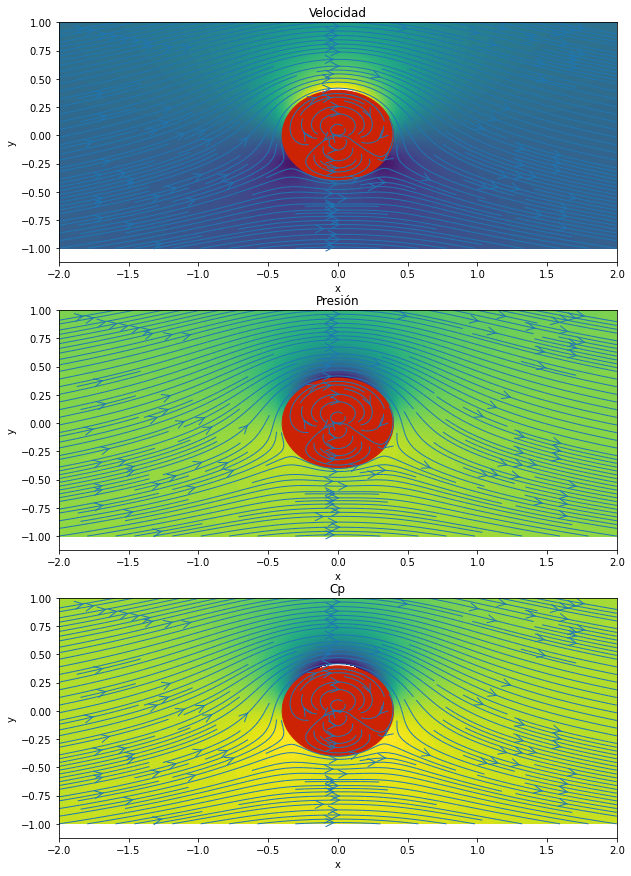

In [ ]:
U=np.sqrt(u_sum*u_sum+v_sum*v_sum)
pres= #usa las expresiones de arriba para completar esto. Deberás elegir un valor de p_inf
cp =
R = math.sqrt(kappa / (2 * math.pi * u_inf))


#presion

fig,ax = plt.subplots(figsize=(width,height))
ax.contourf(X, Y, .....)
ax.streamplot(X, Y, u_sum,v_sum,
                  density=2, linewidth=1, arrowsize=2, arrowstyle='->')
circle = plt.Circle((0, 0), radius=R, color='#CD2305', alpha=1)
ax.add_patch(circle)

ax.set_title('Presión')
ax.set_xlabel("x")
ax.set_ylabel("y")


# cp








## Parte 3: Analizando el campo de velocidades

Para realizar un análisis del campo de velocidades y facilitar algunos cálculos vamos a expresar el campo de velocidades en coordenadas polares. Esto lo haremos mediante la siguiente transformación de coordenadas:

$$ u_r=u\cos\theta + v\sin\theta$$
$$ u_{\theta}=-u\sin\theta + v\cos\theta$$

donde $u(x,y)$, $v(x,y)$ son las componentes de la velocidad expresadas en coordenadas Cartesianas y $u_r(r,\theta)$, $ u_{\theta}(r,\theta)$ son las componentes de la velocidad expresadas en coordenadas polares, y donde

$$ x^2+y^2=r^2,\qquad x=r\cos\theta, \qquad y=r\sin\theta$$

Utilizando las relaciones anteriores, obtenemos el campo de velocidades para el flujo alrededor del cilindro en rotación en coordenadas polares:

$$u_r\left(r,\theta\right) =  \cos\theta \left(U_\infty-\frac{\kappa}{2\pi r^2}\right)$$

$$u_\theta\left(r,\theta\right) = -\sin\theta \left(U_\infty +\frac{\kappa}{2\pi r^2}\right) - \frac{\Gamma}{2\pi r}$$




<font color='green'>**3.a)**</font>  (A MANO) Partiendo del campo de velocidades en coordenadas cartesianas, obtén el campo de velocidades en coordenadas polares y comprueba que el resultado coincide con lo expuesto anteriormente.

<font color='green'>**3.b)**</font>  (A MANO) Considerando que en $r=R$ la velocidad en dirección radial es nula (puesto que queremos modelar que existe un cilindro sólido de radio $R$), utiliza la expresión
$$u_r\left(r,\theta\right) =  \cos\theta \left(U_\infty-\frac{\kappa}{2\pi r^2}\right)$$
para obtener
$$R=\sqrt{\frac{\kappa}{2\pi U_{\infty}}}$$
Esta expresión nos permite determinar el radio del "cilindro sólido" que estamos modelando en función de la intensidad del doblete y de la corriente uniforme.



<font color='green'>**3.c)**</font>  (A MANO) Sustituye el resultado anterior en la expresión del campo de velocidades en coordenadas polares para obtener:
$$u_r\left(r,\theta\right) = U_\infty \cos\theta \left(1-\frac{R^2}{r^2}\right)$$

$$u_\theta\left(r,\theta\right) = -U_\infty \sin\theta \left(1+\frac{R^2}{r^2}\right) - \frac{\Gamma}{2\pi r}$$


<font color='green'>**3.d)**</font>  Calcula la posición de los puntos de remanso y representalos gráficamente sobre el campo de velocidades y el cilindro. Ayuda: debe ser parecida a la figura 6.29 del documento.


In [ ]:
#hacer aqui la representacion grafica



<font color='green'>**3.e)**</font>  Representa gráficamente el valor del coeficiente de presión en la superficie del cilindro $c_p$ frente a $\theta$, para dos situaciones:

* $\Gamma=0$
* $\Gamma\neq 0$

Para ello, tendrás que evaluar la velocidad en $r=R$ para distintos valores de $\theta$, lo que te permitirá calcular el coeficiente de presión para dichos valores de  $\theta$. Ayuda: debe ser parecida a la figura 6.27 del documento.

In [ ]:
#hacer aqui la representacion grafica



<font color='green'>**3.f)**</font>  (A MANO) Mediante integración, calcula la expresión de la fuerza de sustentación $F_L$ (en $y$) y de arrastre $F_D$ (en $x$) por unidad de longitud sobre el cilindro. Puedes encontrar en el documento de ayuda la forma de calcularlas.

¿Tiene sentido el resultado obtenido para la fuerza de arrastre? Explica detalladamente lo que ocurre y cuál sería el resultado esperado.

Describe la relación entre la fuerza de sustentación y la intensidad del vórtice $\Gamma$. ¿Qué relación hay entre la fuerza de sustentación y la curva representada en el apartado <font color='green'>**3.e)**</font>?

Contestar aquí **detalladamente** a las preguntas anteriores: ....

....

...

...

## Parte 4: Aplicación práctica

<font color='green'>**4.a)**</font> Piensa en una aplicación práctica de este sistema y explícala detalladamente. Debes aportar algún dibujo o esquema sencillo, indicando:
- la dirección del flujo
- las fuerzas que actúan sobre el sistema (de cualquier origen, aerodinámico u otro), evidenciando la utilidad de los cilindros en rotación en el diseño.

<font color='green'>**4.b)**</font> La velocidad lineal en la superficie del cilindro sólido se puede considerar que es equivalente a la del vórtice libre en $r=R$, es decir

$$V_\theta = \frac{\Gamma}{2\pi R}$$

y la velocidad lineal en el cilindro también se puede escribir como

$$V_\theta = \omega R$$

donde $\omega$ es la velocidad angular de giro del cilindro.

Para esta aplicación, los parámetros de diseño (a elegir por vosotros) serán las dimensiones geométricas y masa del cuerpo/vehículo, el radio del cilindro $R$, la velocidad de la corriente libre $U_{\infty}$, la densidad del fluido $\rho$ y la fuerza que debe ejercer el cilindro, $F_L$ (debéis estimar el valor sabiendo el peso del cuerpo o fuerza a vencer). Por otro lado, $\kappa$ y $\Gamma$ serán variables auxiliares que nos sirven para construir el modelo de flujo con el que hemos trabajado en los apartados anteriores.

Indica los valores numéricos de todas estas variables:  dimensiones geométricas y masa del objeto/vehículo, $R$, $U_{\infty}$, $\kappa$, $\rho$, $\Gamma$ y $F_L$. Además, considerando lo anterior, estima el valor de la velocidad de giro $\omega$ del cilindro (o de los cilindros) para conseguir el objetivo buscado en la aplicación que has propuesto.

<font color='green'>**4.c)**</font> Razona cómo podrías estimar la fuerza de arrastre en los cilindros en el sistema real mediante ensayos experimentales. Identifica los números adimensionales relevantes y propón un diseño para el experimento (valores numéricos de las variables involucradas para el ensayo experimental).

...

...

...

...

In [ ]:
# puedes hacer aquí los cálculos, por ejemplo el cálculo de kappa y de w
